In [33]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_dir = pathlib.Path("Plant_leave_diseases_dataset_with_augmentation")

image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

61484

In [34]:
my_batch_size = 32
img_height = 180
img_width = 180

In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=my_batch_size,
)

Found 61486 files belonging to 39 classes.
Using 49189 files for training.


In [36]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=my_batch_size
)

Found 61486 files belonging to 39 classes.
Using 12297 files for validation.


In [37]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [38]:
model_number = 39

model = tf.keras.models.load_model('zapisane_modele/model_%d_epok' % (model_number))

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Blueberry___healthy with a 76.31 percent confidence.


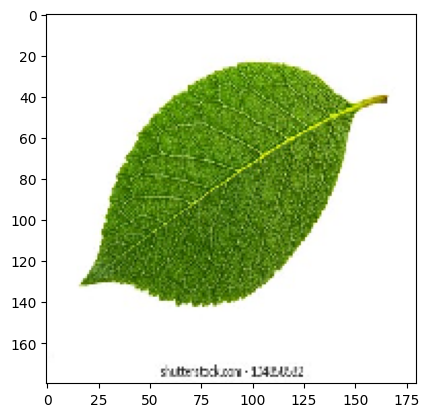

In [39]:
grape_healthy_url = "https://www.shutterstock.com/image-photo/cherry-leaf-260nw-104858582.jpg"
grape_healthy_path = tf.keras.utils.get_file("Cherry_leaf_healthy", origin=grape_healthy_url)

img = tf.keras.utils.load_img(
    grape_healthy_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(img)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to Soybean___healthy with a 49.91 percent confidence.


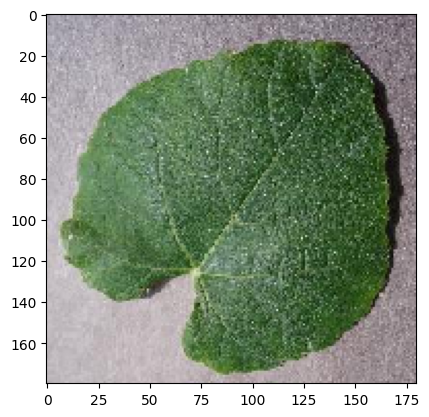

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

image_path = "D:/projekt/Plant_leave_diseases_dataset_with_augmentation/Grape___healthy/image (2).JPG"

img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

plt.imshow(img)
plt.show()